This script countains Analysis and visualizations of the entire set of North American Juniors Hockey data

In [1]:
# Dependencies
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
# Read CSV into DF
df =pd.read_csv('data_sets/juniors_data.csv')
df

,LEAGUE,PLAYER_ID,POSITION,SEASON,AGE_SEPT_15,GP,G,A,TP,PPG,...,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DY_STATUS,SHOOTS,DRAFTED,NHL_PPG,NHL_GP,NHL_DV
0,WHL,100056/tye-hand,D,2013,18.252778,31,0,2,2,0.060000,...,1,31,1,0,DY,L,No,0.000000,0,0
1,OHL,100141/sean-thompson,F,2004,20.625000,38,6,5,11,0.289474,...,3,137,0,1,DY+2,L,No,0.000000,0,0
2,USHL,100151/stanislav-dzakhov,F,2013,20.497222,22,3,3,6,0.272727,...,2,66,0,0,DY+2,R,No,0.000000,0,0
3,QMJHL,100165/owen-bennington,F,2015,20.444444,66,2,2,4,0.060000,...,2,125,0,0,DY+2,R,No,0.000000,0,0
4,QMJHL,100224/tomas-pavelka,D,2013,20.294444,56,8,31,39,0.696429,...,2,123,0,0,DY+2,L,No,0.000000,0,0
5,QMJHL,100294/alexandre-sansregret,F,2011,17.822222,21,0,1,1,0.050000,...,1,21,1,0,DY-1,L,No,0.000000,0,0
6,WHL,100304/carson-stadnyk,F,2016,21.605556,71,21,28,49,0.690141,...,4,284,0,1,DY+3,L,No,0.000000,0,0
7,OHL,100323/richard-mraz,F,2013,20.572222,8,1,0,1,0.130000,...,0,8,1,0,DY+2,R,No,0.000000,0,0
8,USHL,100430/lukas-buchta,D,2015,20.777778,59,8,12,20,0.338983,...,1,78,0,0,DY+2,R,No,0.000000,0,0
9,WHL,100457/michal-plutnar,D,2014,20.566667,51,3,9,12,0.235294,...,3,182,0,1,DY+2,R,No,0.000000,0,0


In [19]:
# Make new variable for non-drafted, drafted, made NHL called player status
df['PLAYER_STATUS'] = 'place holder'
df.head()

,LEAGUE,PLAYER_ID,POSITION,SEASON,AGE_SEPT_15,GP,G,A,TP,PPG,...,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DY_STATUS,SHOOTS,DRAFTED,NHL_PPG,NHL_GP,NHL_DV,PLAYER_STATUS
0,WHL,100056/tye-hand,D,2013,18.252778,31,0,2,2,0.060000,...,31,1,0,DY,L,No,0.0,0,0,place holder
1,OHL,100141/sean-thompson,F,2004,20.625000,38,6,5,11,0.289474,...,137,0,1,DY+2,L,No,0.0,0,0,place holder
2,USHL,100151/stanislav-dzakhov,F,2013,20.497222,22,3,3,6,0.272727,...,66,0,0,DY+2,R,No,0.0,0,0,place holder
3,QMJHL,100165/owen-bennington,F,2015,20.444444,66,2,2,4,0.060000,...,125,0,0,DY+2,R,No,0.0,0,0,place holder
4,QMJHL,100224/tomas-pavelka,D,2013,20.294444,56,8,31,39,0.696429,...,123,0,0,DY+2,L,No,0.0,0,0,place holder


In [22]:
# Create function for not-drafted, drafted, made-NHL
def draft_checker(x):
    if x.DRAFTED == 'No':
        return 'Not Drafted'
    elif x.DRAFTED == 'Yes' and x.NHL_DV == 0:
        return 'Drafted'
    return 'NHL Player'

In [23]:
# Run function on Data and check work
df['PLAYER_STATUS'] = df.apply(draft_checker, axis=1)
df

,LEAGUE,PLAYER_ID,POSITION,SEASON,AGE_SEPT_15,GP,G,A,TP,PPG,...,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DY_STATUS,SHOOTS,DRAFTED,NHL_PPG,NHL_GP,NHL_DV,PLAYER_STATUS
0,WHL,100056/tye-hand,D,2013,18.252778,31,0,2,2,0.060000,...,31,1,0,DY,L,No,0.000000,0,0,Not Drafted
1,OHL,100141/sean-thompson,F,2004,20.625000,38,6,5,11,0.289474,...,137,0,1,DY+2,L,No,0.000000,0,0,Not Drafted
2,USHL,100151/stanislav-dzakhov,F,2013,20.497222,22,3,3,6,0.272727,...,66,0,0,DY+2,R,No,0.000000,0,0,Not Drafted
3,QMJHL,100165/owen-bennington,F,2015,20.444444,66,2,2,4,0.060000,...,125,0,0,DY+2,R,No,0.000000,0,0,Not Drafted
4,QMJHL,100224/tomas-pavelka,D,2013,20.294444,56,8,31,39,0.696429,...,123,0,0,DY+2,L,No,0.000000,0,0,Not Drafted
5,QMJHL,100294/alexandre-sansregret,F,2011,17.822222,21,0,1,1,0.050000,...,21,1,0,DY-1,L,No,0.000000,0,0,Not Drafted
6,WHL,100304/carson-stadnyk,F,2016,21.605556,71,21,28,49,0.690141,...,284,0,1,DY+3,L,No,0.000000,0,0,Not Drafted
7,OHL,100323/richard-mraz,F,2013,20.572222,8,1,0,1,0.130000,...,8,1,0,DY+2,R,No,0.000000,0,0,Not Drafted
8,USHL,100430/lukas-buchta,D,2015,20.777778,59,8,12,20,0.338983,...,78,0,0,DY+2,R,No,0.000000,0,0,Not Drafted
9,WHL,100457/michal-plutnar,D,2014,20.566667,51,3,9,12,0.235294,...,182,0,1,DY+2,R,No,0.000000,0,0,Not Drafted


In [33]:
# How many of the 13,997 players in the data set were drafted by NHL Teams fall into each player status category?
player_status_df = df.groupby('PLAYER_STATUS')
# total player count
player_ct = df['PLAYER_ID'].count()
# Player status count
player_status_ct = player_status_df['PLAYER_ID'].count()
# Player count percentage of whole
player_pct_whole = (player_status_ct / player_ct)

In [37]:
# New DF contain counts for each group as well as their percentage of the whole
player_pct_df = pd.DataFrame({'Player Count':player_status_ct,
                             'Percentage of playerbase': player_pct_whole})
# Format into percent
player_pct_df['Percentage of playerbase'] = player_pct_df['Percentage of playerbase'].astype(float).map("{:.2%}".format)


player_pct_df

,Player Count,Percentage of playerbase
PLAYER_STATUS,,
Drafted,1606,11.47%
NHL Player,1204,8.60%
Not Drafted,11187,79.92%


Text(0.5, 1.0, "Percentage of Players Drafted who've Played in the NHL")

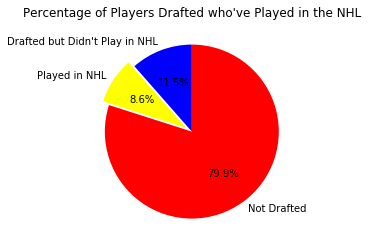

In [42]:
# Pie chart of Players not drafted, drafted and made it to NHL
# Pie Chart nhl/vs non
labels= [ "Drafted but Didn't Play in NHL", 'Played in NHL', 'Not Drafted']
colors= ['blue','Yellow','red']
explode= [0,.08,0]

plt.pie(player_pct_whole, labels = labels, colors=colors, startangle = 90,autopct='%.1f%%', explode=explode)
plt.title("Percentage of Players Drafted who've Played in the NHL")

In [3]:
# create a df with only player stats for cleaner analysis
stats_df = df.drop(['LEAGUE','PLAYER_ID','POSITION','SEASON','AGE_SEPT_15','SEASON_NO','ONLY_1_SEASON','MIN_3_SEASONS','DY_STATUS','SHOOTS','DRAFTED','NHL_DV'], axis=1)
stats_df

,GP,G,A,TP,PPG,SEASON_>20GP,CUM_GP,NHL_PPG,NHL_GP
0,31,0,2,2,0.060000,1,31,0.000000,0
1,38,6,5,11,0.289474,3,137,0.000000,0
2,22,3,3,6,0.272727,2,66,0.000000,0
3,66,2,2,4,0.060000,2,125,0.000000,0
4,56,8,31,39,0.696429,2,123,0.000000,0
5,21,0,1,1,0.050000,1,21,0.000000,0
6,71,21,28,49,0.690141,4,284,0.000000,0
7,8,1,0,1,0.130000,0,8,0.000000,0
8,59,8,12,20,0.338983,1,78,0.000000,0
9,51,3,9,12,0.235294,3,182,0.000000,0


In [24]:
# Mean statistics for all juniors players
stats_df.mean(axis=0)

GP               47.905908
G                10.416161
A                16.922555
TP               27.338715
PPG               0.517128
SEASON_>20GP      2.219976
CUM_GP          129.612060
NHL_PPG           0.023757
NHL_GP           21.133029
dtype: float64